<a href="https://colab.research.google.com/github/bballdave025/rib-wrist-in-bin-din/blob/colab-02-20250423T013000-cnn-gradcam/Paper_Code_Prep_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Model Structures for RMFB Paper<br/>Part I: CNN Baseline and No-Frills Resnet50

## Rebuilding All Models with Latest Versions as well as<br/>Doing Learned Visualization of Architecture Structure<sup>\[NB1\]\[NB2\]\[NB3\]</sup><br/>and Especially Grad-CAM<sup>\[NB4\]</sup> Visual Classification Explanations  

David BLACK, GitHub @bballdave025 ,

Working Title for Technical Paper: &quot;AI Computer Vision Methods for
Finding Information-bearing Writing Surfaces (Especially Codex Fragments) Reused in Other Codex Bindings&quot;

Working Title for <em>Fragmentology</em><sup>[NB5]</sup>
(Manuscript Studies) Paper: None Yet
(It would be nice to have some statistics.)

#### Why these Notebooks?

There are several reasons for writing these notebooks and doing these various visualizations. The most acceptable (I almost put that in quotation marks; I mean the most-what-employers-or-theoretical-AI/ML-people-would-like-to-hear) answers are: <br/>&nbsp;&nbsp;&nbsp;1) I want to give <strong>greater explainability of the CV model  decisions</strong>,  especially as it relates to the audience of the paper and their acceptance of a non-manual, non-human method, possibly seen as an intruder  into the Manuscript Studies community. I think that if they see the model  making decisions in the same way that <em>they</em> would make decisions, they will be more likely to see it as an aide doing such things as allowing grad students to analyze fragments rather than finding them. For clarity, I mention that the audience consists of the readers of the Binding-Fragment paper to be submitted to <em>Fragmentology</em>; <br/>&nbsp;&nbsp;&nbsp;2) I want to make better decisions as to which model will most-likely make the <strong>goal of ~95% precision and ~70% recall possible on a wide variety of writing-material and binding images</strong>. The ultimate goal for (this stage of) the study is to run the algorithm over as many of FamilySearch's earliest-to-18th Century images (let's make it readable: images from the earliest records they have up to the 1700s) as possible. Through the analysis and visualization of how well the chosen model or models performs, we can have higher confidence that an eventual <strong>one run</strong> over what I'll estimate as 0.5 to 1 billion images with a thoroughly tested and understood/explainable model will <strong>suffice for at least a decade</strong>. <br/>&nbsp;&nbsp;&nbsp;3) (This is a long one.) Especially with the Grad-CAM visualizations of the salient features for model decisions, I want to have something to <strong>show to the Manuscript Studies/Fragmentology community that will get them excited</strong> about <em>helping us</em> to <em>create better training sets</em> and to <em>help create new training sets for interesting phenomena/occurences</em> (for lack of a better word describing what each of the classifications describes). I think that the best example of this is to create a model (or add to the existing model) the search for images that not only have iron-gall-ink damage to the point of going through the page (something I have tried to do without expertise), but which are at different stages<sup>\[NB5\]</sup> of the iron-gall-ink (and other corrosive dye) damage process. I'm also going to face the fact that, even as concerns the main object of study—fragments found in bindings—I'm perhaps passingly knowledgeable but by no means an expert. Seeing heat maps describing what the model thinks is most important in finding a specific images I've classified should make this a more interesting invitation, as it allows quick view of the types of phenomena such models can find in and on writing materials, bindings, etc.

For my estimate of the sum total of such documents, I make reference to the <em>Company Facts</em> page on FamilySearch [as I see it now (archived with numbers updated 2025-04-07)](https://web.archive.org/web/20250423044740/https://www.familysearch.org/en/newsroom/company-facts), which reports "5.65 Billion \[Digital Images Published\]" . For a second opinion, I've looked at the running counter of images digitized at https://www.familysearch.org/en/records/images/, which is at \[let me go take a screenshot\]

<br/>
<div>
  <img src="https://raw.githubusercontent.com/bballdave025/rib-wrist-in-bin-din/refs/heads/main/FamilySearch_5667347462_5point667-B_Images_2025-04-22T113500-0600.png"
       alt="Screenshot of family search dot org forward slash E N forward slash records forward slash images. Tab name is. QUOTE. Explore Historical Images. END QUOTE. Visible text is. QUOTE. Access billions of documents newline FamilySearch has been collecting historical documents since eighteen ninety four and currently has. Left square bracket. Transcriber's note colon. Number in short scale, i.e. without milliard, billiard, et cetera, so ten to the ninth is read billion, ten to the twelfth is read trillion, et cetera. Right bracket. five billion six hundred sixty-seven million, three hundred forty-seven thousand four hundred sixty-one images from all over the world. That makes FamilySearch one of the world's largest collections of historical documents exclamation point. END QUOTE. Bottom toolbar shows eleven colon thirty-five A M. and. four slash twenty-two forward slash two thousand twenty-five. Left Bracket. Date format is as in the stupid U S A format comma month slash day slash year. Right Bracket. An errow points from the annotated text. QUOTE. M D T. Left parenthesis. G M T minus six Right parenthesis. END QUOTE. to the time and date."
       width="500px">
</div>
<br/>

5,667,347,461 (five billion six hundred sixty-seven million, three hundred forty-seven thousand four hundred sixty-one) images. The type of binding we're seeking is most-commonly found in Western and Central Europe going into Russia and Persia, with some around the Mediterranean—including Muslim and Jewish records—the Near East, and the Americas—mostly (Catholic) South America. Since I think that records from the current United States of America probably take up at least a third of all digital images published, and Western/Central Europe <em>at least</em> one quarter of the remaining digital images, my guess is that a search in those geographical regions from the earliest date for which FamilySearch has records to 1799 will yield approximately<br/>$ \frac{2}{3} \cdot \frac{1}{4} \cdot 5.66 \times 10^{9} $ images or $ 9.45 \times 10^{8} \left(\substack{+9e8 \\ -5e9} \: \mathrm{systematic}\right) \left(\pm 0.25e9 \;  \mathrm{who} \! \cdot \! \mathrm{knows}\right) $,<br/>$ \frac{1}{6}\;\mathrm{ish} $ of the records, 500 million to 1.5 billion (again, very $ \mathrm{ish} $).<br/>(Note that my methodology will let in records from the 1800s and even a few from the 1900s, but not on purpose.)

The current study will include around hundreds of thousands of images, with an approximate guess of half being from FamilySearch, for the intial study and publication in <em>Fragmentology</em>. This study entails at least thousands of images, up to tens of thousands, for the training, validation, and test sets. (That is, tens of thousands of images split into the three sets.)

In [24]:
#no-more#!date +'%s_%Y-%m-%dT%H:%M:%S%z'

1745382382_2025-04-23T04:26:22+0000


Original output when first writing the re-do

`1745382382_2025-04-23T04:26:22+0000`

Local: `2025-04-22T22:26:22-0600`

In [1]:
!date +'%s_%Y-%m-%dT%H:%M:%S%z'

1745435234_2025-04-23T19:07:14+0000


Output with this commit:

`1745435234_2025-04-23T19:07:14+00000`

Local: `2025-04-23T13:07:14-0600`

(I'll try to keep this updated for each commit, or at least for each pull request.)

## Specifics for Colab Environment - I would minimize it unless you need it

In [72]:
!pip freeze

absl-py==1.4.0
accelerate==1.5.2
aggdraw==1.3.19
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.14.0.37.22
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
communit

### Output of `pip freeze` at approximately `timestamp`

```
absl-py==1.4.0
accelerate==1.5.2
aggdraw==1.3.19
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.14.0.37.22
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.3.2
cramjam==2.10.0
cryptography==43.0.3
cuda-python==12.6.2.post1
cudf-cu12 @ https://pypi.nvidia.com/cudf-cu12/cudf_cu12-25.2.1-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl
cudf-polars-cu12==25.2.2
cufflinks==0.17.3
cuml-cu12==25.2.1
cupy-cuda12x==13.3.0
cuvs-cu12==25.2.1
cvxopt==1.3.2
cvxpy==1.6.5
cycler==0.12.1
cyipopt==1.5.0
cymem==2.0.11
Cython==3.0.12
dask==2024.12.1
dask-cuda==25.2.0
dask-cudf-cu12==25.2.2
dask-expr==1.1.21
datascience==0.17.6
db-dtypes==1.4.2
dbus-python==1.2.18
debugpy==1.8.0
decorator==4.4.2
defusedxml==0.7.1
Deprecated==1.2.18
diffusers==0.32.2
distributed==2024.12.1
distributed-ucxx-cu12==0.42.0
distro==1.9.0
dlib==19.24.6
dm-tree==0.1.9
docker-pycreds==0.4.0
docstring_parser==0.16
docutils==0.21.2
dopamine_rl==4.1.2
duckdb==1.2.2
earthengine-api==1.5.11
easydict==1.13
editdistance==0.8.1
eerepr==0.1.1
einops==0.8.1
en_core_web_sm @ https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl#sha256=1932429db727d4bff3deed6b34cfc05df17794f4a52eeb26cf8928f7c1a0fb85
entrypoints==0.4
et_xmlfile==2.0.0
etils==1.12.2
etuples==0.3.9
Farama-Notifications==0.0.4
fastai==2.7.19
fastcore==1.7.29
fastdownload==0.0.7
fastjsonschema==2.21.1
fastprogress==1.0.3
fastrlock==0.8.3
filelock==3.18.0
firebase-admin==6.7.0
Flask==3.1.0
flatbuffers==25.2.10
flax==0.10.5
folium==0.19.5
fonttools==4.57.0
frozendict==2.4.6
frozenlist==1.5.0
fsspec==2025.3.2
future==1.0.0
gast==0.6.0
gcsfs==2025.3.2
GDAL==3.6.4
gdown==5.2.0
geemap==0.35.3
geocoder==1.38.1
geographiclib==2.0
geopandas==1.0.1
geopy==2.4.1
gin-config==0.5.0
gitdb==4.0.12
GitPython==3.1.44
glob2==0.7
google==2.0.3
google-ai-generativelanguage==0.6.15
google-api-core==2.24.2
google-api-python-client==2.164.0
google-auth==2.38.0
google-auth-httplib2==0.2.0
google-auth-oauthlib==1.2.1
google-cloud-aiplatform==1.88.0
google-cloud-bigquery==3.31.0
google-cloud-bigquery-connection==1.18.2
google-cloud-bigquery-storage==2.30.0
google-cloud-bigtable==2.30.0
google-cloud-core==2.4.3
google-cloud-dataproc==5.18.1
google-cloud-datastore==2.21.0
google-cloud-firestore==2.20.1
google-cloud-functions==1.20.3
google-cloud-iam==2.19.0
google-cloud-language==2.17.1
google-cloud-pubsub==2.29.0
google-cloud-resource-manager==1.14.2
google-cloud-spanner==3.53.0
google-cloud-storage==2.19.0
google-cloud-translate==3.20.2
google-colab @ file:///colabtools/dist/google_colab-1.0.0.tar.gz
google-crc32c==1.7.1
google-genai==1.10.0
google-generativeai==0.8.4
google-pasta==0.2.0
google-resumable-media==2.7.2
google-spark-connect==0.5.2
googleapis-common-protos==1.70.0
googledrivedownloader==1.1.0
graphviz==0.20.3
greenlet==3.2.0
grpc-google-iam-v1==0.14.2
grpc-interceptor==0.15.4
grpcio==1.71.0
grpcio-status==1.71.0
grpclib==0.4.7
gspread==6.2.0
gspread-dataframe==4.0.0
gym==0.25.2
gym-notices==0.0.8
gymnasium==1.1.1
h11==0.14.0
h2==4.2.0
h5netcdf==1.6.1
h5py==3.13.0
hdbscan==0.8.40
highspy==1.9.0
holidays==0.70
holoviews==1.20.2
hpack==4.1.0
html5lib==1.1
httpcore==1.0.8
httpimport==1.4.1
httplib2==0.22.0
httpx==0.28.1
huggingface-hub==0.30.2
humanize==4.12.2
hyperframe==6.1.0
hyperopt==0.2.7
ibis-framework==9.5.0
idna==3.10
imageio==2.37.0
imageio-ffmpeg==0.6.0
imagesize==1.4.1
imbalanced-learn==0.13.0
immutabledict==4.2.1
importlib_metadata==8.6.1
importlib_resources==6.5.2
imutils==0.5.4
inflect==7.5.0
iniconfig==2.1.0
intel-cmplr-lib-ur==2025.1.0
intel-openmp==2025.1.0
ipyevents==2.0.2
ipyfilechooser==0.6.0
ipykernel==6.17.1
ipyleaflet==0.19.2
ipyparallel==8.8.0
ipython==7.34.0
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipytree==0.2.2
ipywidgets==7.7.1
itsdangerous==2.2.0
jaraco.classes==3.4.0
jaraco.context==6.0.1
jaraco.functools==4.1.0
jax==0.5.2
jax-cuda12-pjrt==0.5.1
jax-cuda12-plugin==0.5.1
jaxlib==0.5.1
jeepney==0.9.0
jellyfish==1.1.0
jieba==0.42.1
Jinja2==3.1.6
jiter==0.9.0
joblib==1.4.2
jsonpatch==1.33
jsonpickle==4.0.5
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter-client==6.1.12
jupyter-console==6.1.0
jupyter-leaflet==0.19.2
jupyter-server==1.16.0
jupyter_core==5.7.2
jupyterlab_pygments==0.3.0
jupyterlab_widgets==3.0.14
kaggle==1.7.4.2
kagglehub==0.3.11
keras==3.8.0
keras-hub==0.18.1
keras-nlp==0.18.1
keyring==25.6.0
keyrings.google-artifactregistry-auth==1.1.2
kiwisolver==1.4.8
langchain==0.3.23
langchain-core==0.3.52
langchain-text-splitters==0.3.8
langcodes==3.5.0
langsmith==0.3.31
language_data==1.3.0
launchpadlib==1.10.16
lazr.restfulclient==0.14.4
lazr.uri==1.0.6
lazy_loader==0.4
libclang==18.1.1
libcudf-cu12 @ https://pypi.nvidia.com/libcudf-cu12/libcudf_cu12-25.2.1-py3-none-manylinux_2_28_x86_64.whl
libcugraph-cu12==25.2.0
libcuml-cu12==25.2.1
libcuvs-cu12==25.2.1
libkvikio-cu12==25.2.1
libraft-cu12==25.2.0
librosa==0.11.0
libucx-cu12==1.18.0
libucxx-cu12==0.42.0
lightgbm==4.5.0
linkify-it-py==2.0.3
llvmlite==0.43.0
locket==1.0.0
logical-unification==0.4.6
lxml==5.3.2
Mako==1.1.3
marisa-trie==1.2.1
Markdown==3.8
markdown-it-py==3.0.0
MarkupSafe==3.0.2
matplotlib==3.10.0
matplotlib-inline==0.1.7
matplotlib-venn==1.1.2
mdit-py-plugins==0.4.2
mdurl==0.1.2
miniKanren==1.0.3
missingno==0.5.2
mistune==3.1.3
mizani==0.13.3
mkl==2025.0.1
ml-dtypes==0.4.1
mlxtend==0.23.4
more-itertools==10.6.0
moviepy==1.0.3
mpmath==1.3.0
msgpack==1.1.0
multidict==6.4.3
multipledispatch==1.0.0
multitasking==0.0.11
murmurhash==1.0.12
music21==9.3.0
namex==0.0.8
narwhals==1.35.0
natsort==8.4.0
nbclassic==1.2.0
nbclient==0.10.2
nbconvert==7.16.6
nbformat==5.10.4
ndindex==1.9.2
nest-asyncio==1.6.0
networkx==3.4.2
nibabel==5.3.2
nltk==3.9.1
notebook==6.5.7
notebook_shim==0.2.4
numba==0.60.0
numba-cuda==0.2.0
numexpr==2.10.2
numpy==2.0.2
nvidia-cublas-cu12==12.5.3.2
nvidia-cuda-cupti-cu12==12.5.82
nvidia-cuda-nvcc-cu12==12.5.82
nvidia-cuda-nvrtc-cu12==12.5.82
nvidia-cuda-runtime-cu12==12.5.82
nvidia-cudnn-cu12==9.3.0.75
nvidia-cufft-cu12==11.2.3.61
nvidia-curand-cu12==10.3.6.82
nvidia-cusolver-cu12==11.6.3.83
nvidia-cusparse-cu12==12.5.1.3
nvidia-cusparselt-cu12==0.6.2
nvidia-ml-py==12.570.86
nvidia-nccl-cu12==2.21.5
nvidia-nvcomp-cu12==4.2.0.11
nvidia-nvjitlink-cu12==12.5.82
nvidia-nvtx-cu12==12.4.127
nvtx==0.2.11
nx-cugraph-cu12 @ https://pypi.nvidia.com/nx-cugraph-cu12/nx_cugraph_cu12-25.2.0-py3-none-any.whl
oauth2client==4.1.3
oauthlib==3.2.2
openai==1.75.0
opencv-contrib-python==4.11.0.86
opencv-python==4.11.0.86
opencv-python-headless==4.11.0.86
openpyxl==3.1.5
opentelemetry-api==1.32.1
opentelemetry-sdk==1.32.1
opentelemetry-semantic-conventions==0.53b1
opt_einsum==3.4.0
optax==0.2.4
optree==0.15.0
orbax-checkpoint==0.11.12
orjson==3.10.16
osqp==1.0.3
packaging==24.2
pandas==2.2.2
pandas-datareader==0.10.0
pandas-gbq==0.28.0
pandas-stubs==2.2.2.240909
pandocfilters==1.5.1
panel==1.6.2
param==2.2.0
parso==0.8.4
parsy==2.1
partd==1.4.2
pathlib==1.0.1
patsy==1.0.1
peewee==3.17.9
peft==0.14.0
pexpect==4.9.0
pickleshare==0.7.5
pillow==11.1.0
platformdirs==4.3.7
plotly==5.24.1
plotnine==0.14.5
pluggy==1.5.0
ply==3.11
polars==1.21.0
pooch==1.8.2
portpicker==1.5.2
preshed==3.0.9
prettytable==3.16.0
proglog==0.1.11
progressbar2==4.5.0
prometheus_client==0.21.1
promise==2.3
prompt_toolkit==3.0.51
propcache==0.3.1
prophet==1.1.6
proto-plus==1.26.1
protobuf==5.29.4
psutil==5.9.5
psycopg2==2.9.10
ptyprocess==0.7.0
py-cpuinfo==9.0.0
py4j==0.10.9.7
pyarrow==18.1.0
pyasn1==0.6.1
pyasn1_modules==0.4.2
pycairo==1.28.0
pycocotools==2.0.8
pycparser==2.22
pydantic==2.11.3
pydantic_core==2.33.1
pydata-google-auth==1.9.1
pydot==3.0.4
pydotplus==2.0.2
PyDrive==1.3.1
PyDrive2==1.21.3
pyerfa==2.0.1.5
pygame==2.6.1
pygit2==1.17.0
Pygments==2.18.0
PyGObject==3.42.0
PyJWT==2.10.1
pylibcudf-cu12 @ https://pypi.nvidia.com/pylibcudf-cu12/pylibcudf_cu12-25.2.1-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl
pylibcugraph-cu12==25.2.0
pylibraft-cu12==25.2.0
pymc==5.21.2
pymystem3==0.2.0
pynndescent==0.5.13
pynvjitlink-cu12==0.5.2
pynvml==12.0.0
pyogrio==0.10.0
Pyomo==6.8.2
PyOpenGL==3.1.9
pyOpenSSL==24.2.1
pyparsing==3.2.3
pyperclip==1.9.0
pyproj==3.7.1
pyshp==2.3.1
PySocks==1.7.1
pyspark==3.5.5
pytensor==2.30.3
pytest==8.3.5
python-apt==0.0.0
python-box==7.3.2
python-dateutil==2.8.2
python-louvain==0.16
python-slugify==8.0.4
python-snappy==0.7.3
python-utils==3.9.1
pytz==2025.2
pyviz_comms==3.0.4
PyYAML==6.0.2
pyzmq==24.0.1
raft-dask-cu12==25.2.0
rapids-dask-dependency==25.2.0
ratelim==0.1.6
referencing==0.36.2
regex==2024.11.6
requests==2.32.3
requests-oauthlib==2.0.0
requests-toolbelt==1.0.0
requirements-parser==0.9.0
rich==13.9.4
rmm-cu12==25.2.0
roman-numerals-py==3.1.0
rpds-py==0.24.0
rpy2==3.5.17
rsa==4.9.1
safetensors==0.5.3
scikit-image==0.25.2
scikit-learn==1.6.1
scipy==1.14.1
scooby==0.10.0
scs==3.2.7.post2
seaborn==0.13.2
SecretStorage==3.3.3
Send2Trash==1.8.3
sentence-transformers==3.4.1
sentencepiece==0.2.0
sentry-sdk==2.26.1
setproctitle==1.3.5
shap==0.47.1
shapely==2.1.0
shellingham==1.5.4
simple-parsing==0.1.7
simplejson==3.20.1
simsimd==6.2.1
six==1.17.0
sklearn-compat==0.1.3
sklearn-pandas==2.2.0
slicer==0.0.8
smart-open==7.1.0
smmap==5.0.2
sniffio==1.3.1
snowballstemmer==2.2.0
sortedcontainers==2.4.0
soundfile==0.13.1
soupsieve==2.6
soxr==0.5.0.post1
spacy==3.8.5
spacy-legacy==3.0.12
spacy-loggers==1.0.5
spanner-graph-notebook==1.1.6
Sphinx==8.2.3
sphinxcontrib-applehelp==2.0.0
sphinxcontrib-devhelp==2.0.0
sphinxcontrib-htmlhelp==2.1.0
sphinxcontrib-jsmath==1.0.1
sphinxcontrib-qthelp==2.0.0
sphinxcontrib-serializinghtml==2.0.0
SQLAlchemy==2.0.40
sqlglot==25.20.2
sqlparse==0.5.3
srsly==2.5.1
stanio==0.5.1
statsmodels==0.14.4
stringzilla==3.12.4
sympy==1.13.1
tables==3.10.2
tabulate==0.9.0
tbb==2022.1.0
tblib==3.1.0
tcmlib==1.3.0
tenacity==9.1.2
tensorboard==2.18.0
tensorboard-data-server==0.7.2
tensorflow==2.18.0
tensorflow-datasets==4.9.8
tensorflow-hub==0.16.1
tensorflow-io-gcs-filesystem==0.37.1
tensorflow-metadata==1.17.1
tensorflow-probability==0.25.0
tensorflow-text==2.18.1
tensorflow_decision_forests==1.11.0
tensorstore==0.1.73
termcolor==3.0.1
terminado==0.18.1
text-unidecode==1.3
textblob==0.19.0
tf-slim==1.1.0
tf_keras==2.18.0
thinc==8.3.6
threadpoolctl==3.6.0
tifffile==2025.3.30
timm==1.0.15
tinycss2==1.4.0
tokenizers==0.21.1
toml==0.10.2
toolz==0.12.1
torch @ https://download.pytorch.org/whl/cu124/torch-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl
torchaudio @ https://download.pytorch.org/whl/cu124/torchaudio-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl
torchsummary==1.5.1
torchvision @ https://download.pytorch.org/whl/cu124/torchvision-0.21.0%2Bcu124-cp311-cp311-linux_x86_64.whl
tornado==6.4.2
tqdm==4.67.1
traitlets==5.7.1
traittypes==0.2.1
transformers==4.51.3
treelite==4.4.1
treescope==0.1.9
triton==3.2.0
tweepy==4.15.0
typeguard==4.4.2
typer==0.15.2
types-pytz==2025.2.0.20250326
types-setuptools==79.0.0.20250422
typing-inspection==0.4.0
typing_extensions==4.13.2
tzdata==2025.2
tzlocal==5.3.1
uc-micro-py==1.0.3
ucx-py-cu12==0.42.0
ucxx-cu12==0.42.0
umap-learn==0.5.7
umf==0.10.0
uritemplate==4.1.1
urllib3==2.3.0
vega-datasets==0.9.0
visualkeras==0.1.4
wadllib==1.3.6
wandb==0.19.9
wasabi==1.1.3
wcwidth==0.2.13
weasel==0.4.1
webcolors==24.11.1
webencodings==0.5.1
websocket-client==1.8.0
websockets==15.0.1
Werkzeug==3.1.3
widgetsnbextension==3.6.10
wordcloud==1.9.4
wrapt==1.17.2
wurlitzer==3.1.1
xarray==2025.1.2
xarray-einstats==0.8.0
xgboost==2.1.4
xlrd==2.0.1
xyzservices==2025.1.0
yarl==1.19.0
ydf==0.11.0
yellowbrick==1.5
yfinance==0.2.55
zict==3.0.0
zipp==3.21.0
zstandard==0.23.0
```

## Models. Hooray!

### Baseline - Standard CNNs,

### Imports, noting deprecated imports that would have been used in previous versions

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
  #  for: Sequential
# from [tensorflow.]keras.models import Sequential
from tensorflow.keras import layers
  #  for: Dense, Activation, Conv2D, MaxPooling2D,
  #+      Dropout, Flatten, Input

#  from [tensorflow.].keras.layers import \
#+               Dense, Dropout, Activation,
#+               Flatten, Conv2D, MaxPooling2D
# from [tensorflow.]keras.layers import Activation
# from [tensorflow.]keras.layers.core import Dense, Flatten
# from [tensorflow.]keras.layers.core import Dropout
# from [tensorflow.]keras.layers.convolutional import Conv2D
# from [tensorflow.]keras.layers.pooling import MaxPooling2D

from tensorflow.keras import optimizers
  # for: Adam
#from [tensorflow.]keras.optimizers import Adam
from tensorflow.keras import metrics
  # for: categorical_crossentropy
#from [tensorflow.]keras.metrics import categorical_crossentropy

from tensorflow.keras import losses
  # for: sparse_categorical_crossentropy
#from [tensorflow.]keras.losses import sparse_categorical_crossentropy

# Callbacks (logging and seeing the model train)
from tensorflow.keras import callbacks
  #  for: CSVLogger, Callback  ## custom callback
  #+      (maybe EarlyStopping, ModelCheckpoint)
#from [tensorflow.]keras.callbacks import CSVLogger


import matplotlib.pyplot as plt
##%matplotlib inline  # Oh yeah, Colab doesn't like this.
import numpy as np

##----------------
#  VISUALIZATIONS
##----------------
from PIL import ImageFont

Packages requiring installation on Google Colab

In [3]:
#  For nice display of durations
!pip install --quiet humanfriendly
from humanfriendly import format_timespan


#  For visualizations of architectures
!pip install --quiet visualkeras
import visualkeras

!pip install --quiet keras_sequential_ascii
from keras_sequential_ascii import keras2ascii

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.8 MB/s eta 0:00:00


### Other Imports for More Specialized Parts
(e.g. looking at documentation, timing things, ...)

In [4]:
import inspect
import timeit

### Let's Bring in the CIFAR10 Dataset - Quick and Reckless Import

In [5]:
#  Let's try with the CIFAR10 Dataset. Why not?
#+ I'm not sure how dataset imports work, so
#+ I'm only importing `cifar10` and not
#+ from tensorflow.keras import datasets
from tensorflow.keras.datasets import cifar10

Download the data.

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### Now to start to inspection and the CNN code!

Inspect an image a little bit, so we know how we need to normalize, etc.

In [7]:
image_for_inspection = x_train[0]

n_pixels_to_inspect = 5

print(f"Image shape: {image_for_inspection.shape}")
top_corner_array = \
    image_for_inspection[0:n_pixels_to_inspect, 0:n_pixels_to_inspect, :]
print(f"Top left corner values:\n{top_corner_array}")


Image shape: (32, 32, 3)
Top left corner values:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  [ 68  54  42]
  [ 98  73  52]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  [ 51  27   8]
  [ 88  51  21]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  [ 83  50  23]
  [110  72  41]]

 [[ 33  25  17]
  [ 38  20   4]
  [ 87  54  25]
  [106  63  28]
  [115  70  33]]

 [[ 50  32  21]
  [ 59  32  11]
  [102  65  34]
  [127  79  39]
  [124  77  36]]]


In [8]:
print( (
    "\n\nNotice that stacking them side-by-side would give us \n"
    "the RGB values as they'd be seen in the image, but \n"
    "I'm going for quick stuff. Assuming 255 would be okay, \n"
    "or perhaps I should say reasonable, but let's do a better\n"
    "check.\n"
    )
)

print( (
    f"Minimum single RGB value: {min(image_for_inspection.flatten())}\n"
    f"Maximum single RGB value: {max(image_for_inspection.flatten())}"
    )
)



Notice that stacking them side-by-side would give us 
the RGB values as they'd be seen in the image, but 
I'm going for quick stuff. Assuming 255 would be okay, 
or perhaps I should say reasonable, but let's do a better
check.

Minimum single RGB value: 0
Maximum single RGB value: 255


In [36]:
# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
#  Cool visualization of some of our new data, but first
#+ let's double check the image size

print(f"Another image's shape: {x_train[1].shape}")

n_pixels_per_side = 32
n_channels = 3
#  Making sure it's what we expect
assert x_train[1].shape == (n_pixels_per_side,
                            n_pixels_per_side,
                            n_channels
       )

print("If you've gotten here, the shape is correct, ", end="")
print(f"({n_pixels_per_side}, {n_pixels_per_side}, {n_channels})")

Another image's shape: (32, 32, 3)
If you've gotten here, the shape is correct, (32, 32, 3)


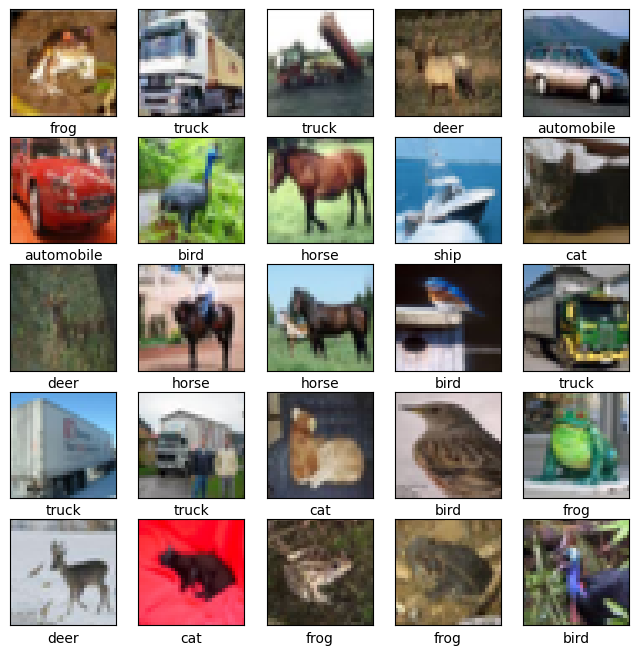

In [10]:
#  The class names with indexes as defined by CIFAR
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

n_classes = len(class_names)

#  Let's show some images
good_figsize_val = 8
plt.figure(figsize=(good_figsize_val, good_figsize_val))

n_rows = 5
n_cols = n_rows  # Let's make our output of images square

n_images_to_show = n_rows * n_cols
for i in range(n_images_to_show):
  plt.subplot(n_rows, n_cols, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  #  CIFAR labels are arrays, which is
  #+ why we need the extra index.
  plt.xlabel(class_names[y_train[i][0]])
##endof:  for i in range(n_images_to_show)

plt.show()

#### I want to see exactly what the `filters` parameter is.

In [11]:
print('\n'.join(inspect.getdoc(layers.Conv2D).splitlines()[:54]))

2D convolution layer.

This layer creates a convolution kernel that is convolved with the layer
input over a 2D spatial (or temporal) dimension (height and width) to
produce a tensor of outputs. If `use_bias` is True, a bias vector is created
and added to the outputs. Finally, if `activation` is not `None`, it is
applied to the outputs as well.

Args:
    filters: int, the dimension of the output space (the number of filters
        in the convolution).
    kernel_size: int or tuple/list of 2 integer, specifying the size of the
        convolution window.
    strides: int or tuple/list of 2 integer, specifying the stride length
        of the convolution. `strides > 1` is incompatible with
        `dilation_rate > 1`.
    padding: string, either `"valid"` or `"same"` (case-insensitive).
        `"valid"` means no padding. `"same"` results in padding evenly to
        the left/right or up/down of the input. When `padding="same"` and
        `strides=1`, the output has the same size as t

#### I wanted to see exactly what the `filters` parameter was:

```
filters: int, the dimension of the output space (the number of filters
         in the convolution).
```

### Model Construction

#### Shell/Skeleton

In [12]:
model_0 = models.Sequential()  # the shell of our model

#### Input Layer

In [13]:
#  Input layer

n_pix = n_pixels_per_side

in_0 = layers.Input(shape=(n_pix, n_pix, n_channels))
model_0.add(in_0)


#  First convolutional layer

conv_1 = layers.Conv2D(filters=32,
                       kernel_size=(3, 3),
                       padding='same'
                )

model_0.add(conv_1_1)
model_0.add(layers.Activation('relu'))

##  Same as
#conv_1_2 = layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         padding='same'
#           )


#  First pooling layer

pool_0 = layers.MaxPooling2D(pool_size=(2, 2),
                             strides=2,
                             padding='valid'
                )
  #  Note that `strides=2` is the default for `pool_size=(2,2)`,
  #+ but I want to make sure I see details. `padding='valid'`
  #+ is also default.

model_0.add(pool_0)

NameError: name 'conv_1_1' is not defined

In [42]:
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### First Convolutional Layer

In [43]:
#  First convolutional layer

n_filters_1 = 32

conv_1 = layers.Conv2D(filters=n_filters_1,
                       kernel_size=(3, 3),
                       padding='same'
                )

model_0.add(conv_1)
model_0.add(layers.Activation('relu'))

##  Same as
#conv_1_2 = layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         padding='same'
#           )

In [44]:
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

### First Pooling Layer

In [45]:
#  First pooling layer

pool_0 = layers.MaxPooling2D(pool_size=(2, 2),
                             strides=2,
                             padding='valid'
                )
  #  Note that `strides=2` is the default for `pool_size=(2,2)`,
  #+ but I want to make sure I see details. `padding='valid'`
  #+ is also default.

model_0.add(pool_0)

In [46]:
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

### Second Convolutional Layer and Pooling

In [47]:
n_filters_2 = 64

conv_2 = layers.Conv2D(filters=n_filters_2,
                       kernel_size=(3, 3),
                       padding='same'
                )

model_0.add(conv_2)
model_0.add(layers.Activation('relu'))

pool_2 = layers.MaxPooling2D(pool_size=(2, 2))

model_0.add(pool_2)

In [48]:
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,392 (75.75 KB)

 Trainable params: 19,392 (75.75 KB)

 Non-trainable params: 0 (0.00 B)

### Third, and for this one, Last Convolutional Layer and Pooling

In [49]:
n_filters_3 = 64

conv_3 = layers.Conv2D(filters=n_filters_3,
                       kernel_size=(3, 3),
                       padding='same'
                )

model_0.add(conv_3)
model_0.add(layers.Activation('relu'))

pool_3 = layers.MaxPooling2D(pool_size=(2, 2))

model_0.add(pool_3)

In [50]:
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Flattening and the Fully Connected Layer

In [51]:
# The Fully Connected layer (after flattening)

model_0.add(layers.Flatten())

fc_layer = layers.Dense(units=64)
model_0.add(fc_layer)
model_0.add(layers.Activation('relu'))

In [52]:
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,920 (476.25 KB)

 Trainable params: 121,920 (476.25 KB)

 Non-trainable params: 0 (0.00 B)

### The Classification Head

In [53]:
decision_head = layers.Dense(units=n_classes)
model_0.add(decision_head)
##no activation for output (not one-hot encoded)#
##model_0.add(layers.Activation('softmax'))

In [54]:
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
print(model_0)

<Sequential name=sequential_1, built=True>


The `print` didn't give us a super-nice summary or visualization, and the summarization is incomplete, so let's look at a few options for visualization

visualkeras.layered_view(model_0)

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


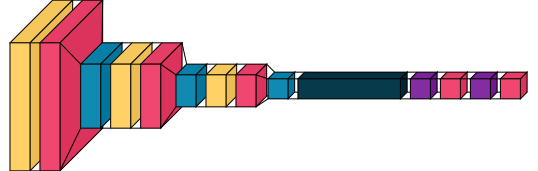

In [60]:
visualkeras.layered_view(model_0)

In [71]:
#  We can better that

!stat /usr/local/share/fonts
!echo
!ls -laH /usr/local/share/fonts/
!echo
!stat /usr/share/fonts/.uuid/

#  Well, maybe not with a quick-and-reckless run.
#+ We'd have to download/build/whatever the fonts.
#+ Something like
#+ ```bash from jupyter
#+ !sudo apt-get install ttf-mscorefonts-installer`
#+ !sudo fc-cache -f
#+ # and check it
#+ !fc-match Arial
#+ ```

#  But I don't know how Jupyter's bash works exactly,
#+ nor do I remember the details of `fc-cache`. It
#+ might require `source ~/.bashrc` before workout.
#+ For all that, the TIME IS NOT NOW

  File: /usr/local/share/fonts
  Size: 4096      	Blocks: 8          IO Block: 4096   directory
Device: 35h/53d	Inode: 5636145     Links: 2
Access: (2775/drwxrwsr-x)  Uid: (    0/    root)   Gid: (   50/   staff)
Access: 2025-04-22 14:28:36.417255600 +0000
Modify: 2025-04-22 13:18:13.000000000 +0000
Change: 2025-04-22 14:28:36.031221201 +0000
 Birth: 2025-04-22 14:28:09.954897582 +0000

total 12
drwxrwsr-x 2 root staff 4096 Apr 22 13:18 .
drwxr-xr-x 1 1000  1000 4096 Apr 22 13:44 ..
-rw-r--r-- 1 root staff   36 Apr 22 13:18 .uuid

stat: cannot statx '/usr/share/fonts/.uuid/': Not a directory


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


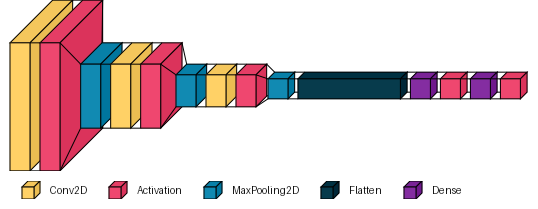

In [66]:
##  What would have come was ...
#font = ImageFont.truetype("arial.ttf", 32)
visualkeras.layered_view(model_0, legend=True) #, font=font)

# Easy fix, just leave out the font parameter

#### Compile Using Optimizer and Loss, Specify Metrics to be Reported

In [75]:
compile_tic = timeit.default_timer()
model_0.compile(
    optimizer=optimizers.Adam(), #default learning rate?
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
compile_toc = timeit.default_timer()
print(f"Compile time: {compile_toc - compile_tic:0.4f} seconds")

Compile time: 0.0236 seconds


## Train of it, with both viewing and logging

cf. [StackOverflow Discussion](https://web.archive.org/web/20250423184118/https://stackoverflow.com/questions/67757496/tensorflow-keras-print-out-and-save-loss-and-gradients-during-model-fit)

In [77]:
class TrainableVariablesCallback(callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print(model_0.trainable_variables)
  ##endof:  on_epoch_end
##endof:  TrainableVariablesCallback

@todo : Get compute use, memory use, etc. and log, e.g., the trainable variables

<strong>REMEMBER TO CHANGE YOUR RUNTIME TO GPU</strong>

(You might need to re-run old cells, but it's worth it.)

In [ ]:
print(f"Num GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

In [78]:
##  This one gives way too much output. If desired, I can
##+ figure out how to send it to a file.
# my_trainable_vars_logger = TrainableVariablesCallback()

!>training.log  # empty the file without deleting the name
my_csv_logger = callbacks.CSVLogger('training.log')

n_epochs = 10

train_tic = timeit.default_timer()

history = model_0.fit(
    x_train, y_train,
    epochs=n_epochs,
    validation_data=(x_test, y_test),
    callbacks=[my_csv_logger] #, my_trainable_vars_logger]
)

train_toc = timeit.default_timer()
print(f"Train time: {train_toc - train_tic:0.4f} seconds")

train_time_str = format_timespan(train_toc - train_tic)
print(f"which equates to: {train_time_str}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3692 - loss: 1.7079[<Variable path=sequential_1/conv2d_3/kernel, shape=(3, 3, 3, 32), dtype=float32, value=[[[[ 4.64016497e-02 -1.72679827e-01  1.02430746e-01 -9.21841934e-02
     1.41779184e-01  6.73028156e-02 -1.98436007e-01 -1.31715843e-02
    -1.14133738e-01 -1.14585020e-01 -1.94851290e-02  2.26080343e-02
    -1.62709311e-01 -1.74786717e-01 -3.79378609e-02 -7.19716325e-02
     1.10232256e-01 -6.43344000e-02  4.68214229e-02  3.14137973e-02
     7.00850189e-02  7.79304057e-02  8.38833377e-02  4.51118387e-02
    -8.74724388e-02 -5.38154207e-02 -1.36087403e-01 -2.71644667e-02
    -8.72785747e-02  6.70354143e-02 -1.62375774e-02  3.50345410e-02]
   [-5.96759953e-02  5.41497059e-02  9.85033140e-02 -6.14111982e-02
     1.28121162e-02 -9.14897323e-02 -8.38481560e-02  9.01494548e-02
    -1.38285965e-01 -7.24224672e-02 -7.92598799e-02  3.74425128e-02
    -2.34022699e-02 -1.25325337e-01  3.35051045e-02 -2.88447738e-02
     6.35634139e-0

KeyboardInterrupt: 

### Standard View of the Accuracy and Loss During Training, maybe more.

In [ ]:
!head -n 20 training.log
!tail -n 20 training.log

In [1]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

NameError: name 'plt' is not defined

## And now, run it on our test set.

In [ ]:
test_locc, test_acc = model_0.evaluate(
    x_test,  y_test,
    verbose=2)

## Here are some nice pictures that will be goals for visualizations <br/>and explanations of Grad-CAM that should help explain things.

Lots of these come from a nice site, learnopencv.com

I feel the creators do a really good job with visualization. The other sources are below all the images.

<br/>
<div>
  <img src="https://raw.githubusercontent.com/bballdave025/rib-wrist-in-bin-din/refs/heads/main/img/cnn_analyticsvidhya.png"
       alt="CNN"
       width="750px">
</div>
<br/>

<br/>
<div>
  <img src="https://raw.githubusercontent.com/bballdave025/rib-wrist-in-bin-din/refs/heads/main/img/cnn_learnopencv_04.png"
       alt="CNN"
       width="750px">
</div>
<br/>

<br/>
<div>
  <img src="https://raw.githubusercontent.com/bballdave025/rib-wrist-in-bin-din/refs/heads/main/img/cnn_learnopencv_05.png"
       alt="CNN"
       width="750px">
</div>
<br/>

<br/>
<div>
  <img src="https://raw.githubusercontent.com/bballdave025/rib-wrist-in-bin-din/refs/heads/main/img/cnn_learnopencv_06.png"
       alt="CNN"
       width="1000px">
</div>
<br/>

<br/>
<div>
  <img src="https://raw.githubusercontent.com/bballdave025/rib-wrist-in-bin-din/refs/heads/main/img/cnn_learnopencv_01.png"
       alt="CNN Code and Architecture Mix"
       width="500px">
</div>
<br/>

That shows a bit how we get to a point where they might trust us. Now observe the Grad-CAM wonder.

<br/>
<div>
  <img src="https://raw.githubusercontent.com/bballdave025/rib-wrist-in-bin-din/refs/heads/main/img/orig_image_grad_camm_fig_2-1.png"
       alt="Grad-CAM Cat and Dog, Original"
       width="500px">
</div>
<br/>

<br/>
<div>
  <img src="https://raw.githubusercontent.com/bballdave025/rib-wrist-in-bin-din/refs/heads/main/img/combination_dog_guidedbackprop_and_gradcam_then_ResNet.png"
       alt="Grad-Cam for dog, combined"
       width="500px">
</div>
<br/>

<br/>
<div>
  <img src="https://raw.githubusercontent.com/bballdave025/rib-wrist-in-bin-din/refs/heads/main/img/combination_dog_guidedbackprop_and_gradcam_then_ResNet.png"
       alt="Grad-Cam Dog details, combined"
       width="500px">
</div>
<br/>

Pretty convincing for me. I would definitely call this explainable AI.

<br/>
<div>
  <img src="https://raw.githubusercontent.com/bballdave025/rib-wrist-in-bin-din/refs/heads/main/img/interesting_semantic_segmentation_gradcam.png"
       alt="Grad-Cam"
       width="500px">
</div>
<br/>

<br/>
<div>
  <img src="https://raw.githubusercontent.com/bballdave025/rib-wrist-in-bin-din/refs/heads/main/img/decisions_for_right_reasons_gender_issue_gradcam.png"
       alt="Grad-Cam important gender issue"
       width="500px">
</div>
<br/>

In [ ]:
# https://pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/

-yGHUa5PL4A

Fine-Tuning ResNet50 A Practical Guide by It's Amit Jan 2025

https://adamharley.com/nn_vis/cnn/3d.html

https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network
https://datascience.stackexchange.com/questions/12851/how-do-you-visualize-neural-network-architectures
https://datascience.stackexchange.com/questions/2670/visualizing-deep-neural-network-training
https://learnopencv.com/understanding-convolutional-neural-networks-cnn/
https://www.analyticsvidhya.com/blog/2020/10/what-is-the-convolutional-neural-network-architecture/


https://www.researchgate.net/figure/The-overall-LeNet-architecture-The-numbers-at-the-convolution-and-pooling-layers_fig2_318972455

https://pyimagesearch.com/2020/03/09/grad-cam-visualize-class-activation-maps-with-keras-tensorflow-and-deep-learning/

https://github.com/jacobgil/pytorch-grad-cam